# **Extending Analysis on IMF Loans and Immigration Rates: LASSO**

## 1. Brief Introduction to LASSO & How it Relates to our Project

The relationship between IMF Structural Adjustment Loans and immigration or asylum rates is a complex and multifaceted issue. By leveraging statistical models like LASSO, we aim to isolate the most influential variables and test their significance. This allows us to disentangle the effects of these loans from other socioeconomic factors that may drive migration trends.

Least Absolute Shrinkage and Selection Operator) is a type of regression that performs 
variable selection and regularization. It addresses multicollinearity by shrinking some coefficients to zero, 
effectively removing less important variables from the model. By doing this, LASSO reduces variance at the 
expense of introducing a small bias. Choosing the tuning parameter (lambda) to minimize MSE (which is a function of both bias and variance) through cross-validation is crucial to achieving the right balance between bias and variance.

For an excellent, intuitive primer on LASSO regression, see the free textbook https://www.statlearning.com/

In [97]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import statsmodels.api as sm

## 2. Basic Data Cleaning

In [98]:
# Load the dataset
data = pd.read_csv("final_data.csv")



data.head()

independent_vars = ["ArmedConflictGov", "SSA", "EAP", "SouthAmerica", 
                    "MiddleEast", "SouthAsia", "Control Corruption", "PoliticalStab", 
                    "Regulatory Quality", "GDPPCPPP", "NaturalDisasterRate","IMFDummy"]

data.rename(columns={"GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]":"GDPPCPPP"}, inplace="True")

# Replace '#DIV/0!' with NaN
data["ImmRate"] = data["ImmRate"].replace("#DIV/0!", np.nan)
data["ImmRate"] = data["ImmRate"].astype(float)

# get rid of commas
data["GDPPCPPP"] = data["GDPPCPPP"].str.replace(",", "")
data["GDPPCPPP"] = data["GDPPCPPP"].astype(float)


dependent_vars = {
    "AsyRate": "Asylum Seeker Rate",
    "RefRate": "Refugee Rate"
}

# Standardize the independent variables
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[independent_vars]), columns=independent_vars)
data_scaled[list(dependent_vars.keys())] = data[list(dependent_vars.keys())]

data_scaled.head()

,ArmedConflictGov,SSA,EAP,SouthAmerica,MiddleEast,SouthAsia,Control Corruption,PoliticalStab,Regulatory Quality,GDPPCPPP,NaturalDisasterRate,IMFDummy,AsyRate,RefRate
0,1.775408,-0.810093,-0.340279,-0.437048,-0.304604,3.760699,-1.156350,-1.708975,-1.944872,-1.000538,-0.124425,-0.630859,118.0491,11107.117150
1,1.775408,-0.810093,-0.340279,-0.437048,-0.304604,3.760699,-1.323610,-1.904246,-1.344809,-0.992193,-0.312795,-0.630859,111.0685,9020.103188
2,1.775408,-0.810093,-0.340279,-0.437048,-0.304604,3.760699,-1.312621,-2.022512,-1.466376,-0.998636,-0.312418,-0.630859,68.6950,9764.592778
3,1.775408,-0.810093,-0.340279,-0.437048,-0.304604,3.760699,-1.493330,-1.751704,-1.677123,-0.982949,-0.290986,-0.630859,54.6692,8443.578433
4,1.775408,-0.810093,-0.340279,-0.437048,-0.304604,3.760699,-1.479766,-1.932487,-1.726048,-0.977691,0.847778,-0.630859,56.5958,7973.011362


## 3. Fitting LASSO Model

- To fit the LASSO Model, we use 10-fold cross validation to compute the tuning parameter lambda with the least MSE.
- There are various ways to approximate a p-value for LASSO-- Some include bootstrapping to find a p-value, reestimating the regression using OLS but dropping the variables whose coefficients have shrunk to zero, or other cool methods, such as selective inference (See http://arxiv.org/abs/1301.7161 and https://github.com/selective-inference/Python-software). 
- We use OLS for simplicities sake, but it is programatically easy to use bootstrapping or other methods


LASSO Regression for Asylum Seeker Rate (AsyRate):

Optimal lambda for AsyRate: 0.6872784168360403


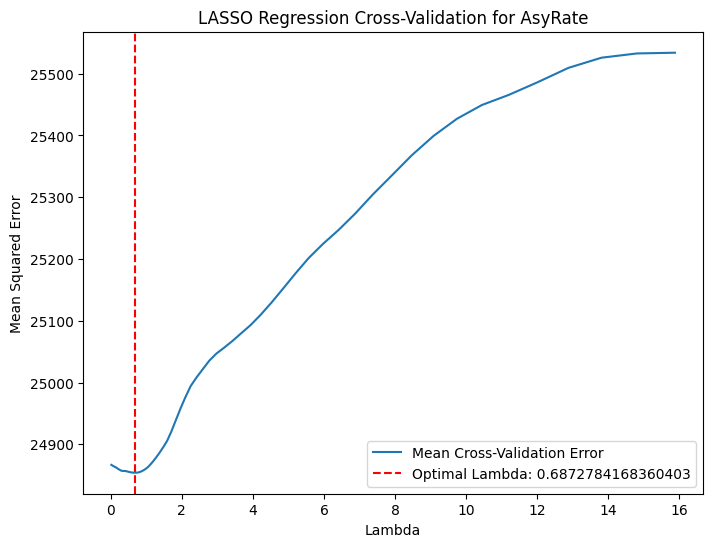


Selected variables after LASSO filtering:
['ArmedConflictGov', 'SSA', 'EAP', 'MiddleEast', 'SouthAsia', 'Control Corruption', 'PoliticalStab', 'Regulatory Quality', 'GDPPCPPP', 'NaturalDisasterRate', 'IMFDummy']

LASSO Coefficients and OLS P-Values:
               Variable  Coefficient       P-Value
6    Control Corruption     9.988860  8.086480e-02
8    Regulatory Quality     3.859011  5.730305e-01
10  NaturalDisasterRate     2.933246  4.262882e-01
11             IMFDummy    -4.167936  2.183589e-01
0      ArmedConflictGov    -7.691800  1.064661e-01
5             SouthAsia    -9.988968  1.211495e-02
7         PoliticalStab   -11.613157  3.614392e-02
9              GDPPCPPP   -14.816735  2.629935e-03
4            MiddleEast   -20.584992  1.104923e-05
2                   EAP   -21.997467  2.185367e-06
1                   SSA   -27.106331  4.162349e-07

LASSO Regression for Refugee Rate (RefRate):

Optimal lambda for RefRate: 0.6589385442432927


C:\Users\abdue_hholu9i\AppData\Local\Temp\ipykernel_32208\2340808270.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["P-Value"] = ols_model.pvalues[selected_vars].values


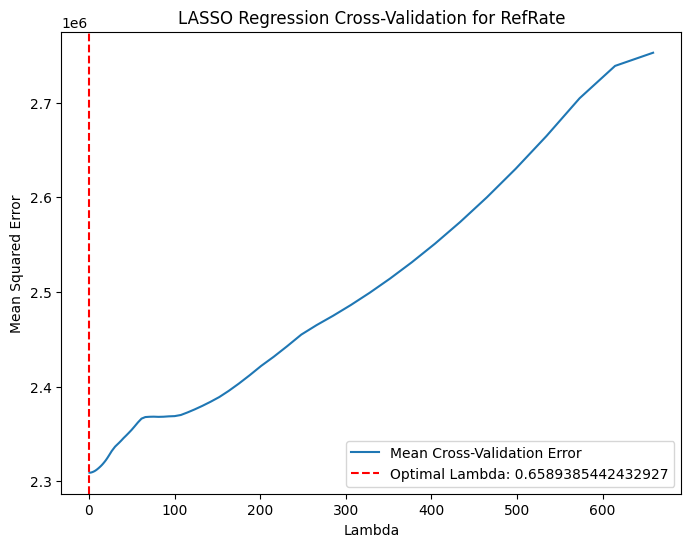


Selected variables after LASSO filtering:
['ArmedConflictGov', 'SSA', 'EAP', 'SouthAmerica', 'MiddleEast', 'SouthAsia', 'Control Corruption', 'PoliticalStab', 'Regulatory Quality', 'GDPPCPPP', 'NaturalDisasterRate', 'IMFDummy']

LASSO Coefficients and OLS P-Values:
               Variable  Coefficient       P-Value
5             SouthAsia   443.500547  5.922323e-18
6    Control Corruption   427.793594  1.479291e-10
11             IMFDummy    70.658319  9.549186e-02
0      ArmedConflictGov    12.237814  8.152239e-01
9              GDPPCPPP   -42.138475  4.218665e-01
10  NaturalDisasterRate   -42.379403  3.341895e-01
3          SouthAmerica   -95.735485  5.968175e-02
2                   EAP  -109.003214  3.196825e-02
7         PoliticalStab  -144.307479  3.374470e-02
1                   SSA  -173.325170  8.354172e-03
4            MiddleEast  -200.770314  1.058867e-04
8    Regulatory Quality  -542.908213  2.493897e-16


In [100]:
# Title: Perform LASSO Regression
# Step 3: Perform LASSO regression for each dependent variable

for dep_var, dep_description in dependent_vars.items():
    print(f"\nLASSO Regression for {dep_description} ({dep_var}):\n")

    # Define the independent and dependent variables
    X = data_scaled[independent_vars]
    y = data_scaled[dep_var]

    # Combine X and y into a single DataFrame for dropping NaN values
    combined_data = pd.concat([X, y], axis=1).dropna()

    # Separate back into X and y after dropping NaN
    X = combined_data[independent_vars]
    y = combined_data[dep_var]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform LASSO with cross-validation
    lasso_cv = LassoCV(cv=10, random_state=42).fit(X_train, y_train)
    optimal_lambda = lasso_cv.alpha_

    # Print optimal lambda
    print(f"Optimal lambda for {dep_var}: {optimal_lambda}")

    # Plot the cross-validation results
    plt.figure(figsize=(8, 6))
    plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), label='Mean Cross-Validation Error')
    plt.axvline(optimal_lambda, linestyle='--', color='red', label=f'Optimal Lambda: {optimal_lambda}')
    plt.xlabel('Lambda')
    plt.ylabel('Mean Squared Error')
    plt.title(f'LASSO Regression Cross-Validation for {dep_var}')
    plt.legend()
    plt.show()

    # Get LASSO coefficients
    coefficients = pd.DataFrame({
        "Variable": independent_vars,
        "Coefficient": lasso_cv.coef_
    })

    # Filter out variables with absolute LASSO coefficients < 0.01 ~= 0 
    selected_features = coefficients[coefficients["Coefficient"].abs() >= 0.01]
    selected_vars = selected_features["Variable"].tolist()

    print("\nSelected variables after LASSO filtering:")
    print(selected_vars)

    # Prepare data for OLS
    X_ols = X_train[selected_vars]
    X_ols = sm.add_constant(X_ols)  # Add constant for OLS intercept

    # Fit OLS model
    ols_model = sm.OLS(y_train, X_ols).fit()

    # Add p-values to the coefficients
    selected_features["P-Value"] = ols_model.pvalues[selected_vars].values

    # Print LASSO coefficients and OLS p-values
    print("\nLASSO Coefficients and OLS P-Values:")
    print(selected_features.sort_values(by="Coefficient", ascending=False))


## 4. Conclusion:
Congruent with results obtained using hierarchical models, IMF Structural Adjustment Loans do not seem to have a significant effect on asylum or refugee rates.

To conclude, LASSO regression provides a valuable tool for addressing multicollinearity by shrinking some coefficients to zero, 
effectively performing variable selection. Compared to Bayesian econometrics, LASSO offers a practical approach to 
handle datasets with many explanatory variables that are potentially correlated. From our analysis, we observe that
key variables influencing each outcome are highlighted while others are excluded, leading to a more parsimonious model.